In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,761411,https://www.airbnb.com/rooms/761411,20230903194145,2023-09-03,city scrape,Condo in Amsterdam · ★4.74 · 1 bedroom · 1 bed...,"Really quiet, spacious and safe, a nice place ...","The neighborhood is very green, quiet, safe an...",https://a0.muscache.com/pictures/10591508/bf30...,4013546,...,4.92,4.42,4.65,0363 D4AD DCF3 E72A 56A2,t,2,0,2,0,2.30
1,768274,https://www.airbnb.com/rooms/768274,20230903194145,2023-09-04,city scrape,Rental unit in Amsterdam · ★4.83 · 1 bedroom ·...,Our cool and spacious loft is perfect for a st...,Our neighbourhood is ons of the most beautiful...,https://a0.muscache.com/pictures/27206847/31f5...,3678216,...,4.94,4.86,4.77,0363 7A50 18E7 51D1 B7F9,t,1,1,0,0,0.64
2,768737,https://www.airbnb.com/rooms/768737,20230903194145,2023-09-03,city scrape,Boat in Amsterdam · ★4.82 · 1 bedroom · 1 bed ...,Room to rent in my houseboat. The room has a p...,It is just outside the Jordan in between the c...,https://a0.muscache.com/pictures/1df40445-354f...,3877342,...,4.87,4.72,4.68,036396BE30827DDB9575,t,3,1,2,0,2.73
3,771217,https://www.airbnb.com/rooms/771217,20230903194145,2023-09-04,previous scrape,Houseboat in Amsterdam · ★5.0 · 3 bedrooms · 3...,"Spacious houseboat in Amsterdam, suitable for ...",The houseboat lies in an area with ± 200 house...,https://a0.muscache.com/pictures/57715927/0808...,4068486,...,5.00,4.67,4.56,0363 D807 AD6C 499A F871,f,1,1,0,0,0.11
4,771343,https://www.airbnb.com/rooms/771343,20230903194145,2023-09-03,city scrape,Rental unit in Amsterdam · ★4.89 · 1 bedroom ·...,Royal Bed & Coffee Room with a very comfortabl...,The building is located in Amsterdam centre in...,https://a0.muscache.com/pictures/ea22d262-7456...,2313061,...,4.91,4.96,4.79,0363 8C61 E9B9 5582 913E,f,2,0,2,0,6.62


In [7]:
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [6]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [8]:
data.isna().values.any()

True

In [19]:
# Check for null values in specific columns
columns_to_check = ['price', 'has_availability' , "host_location", "property_type"]
null_counts = data[columns_to_check].isna().sum()
print(null_counts)

# Fix null values in specific columns


price               0
has_availability    0
host_location       0
property_type       0
dtype: int64


In [20]:
data[columns_to_check].dtypes

price               object
has_availability    object
host_location       object
property_type       object
dtype: object

In [26]:
data['price'] = data['price'].str.replace('$', '').str.replace(',', '')

# Convert 'price' column to numeric data type
data['price'] = pd.to_numeric(data['price'])

# Check the data type of the 'price' column
print(data['price'].dtype)

float64


C:\Users\Access\AppData\Local\Temp\ipykernel_4188\3927522784.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '').str.replace(',', '')


In [27]:
data[columns_to_check].dtypes

price               float64
has_availability     object
host_location        object
property_type        object
dtype: object

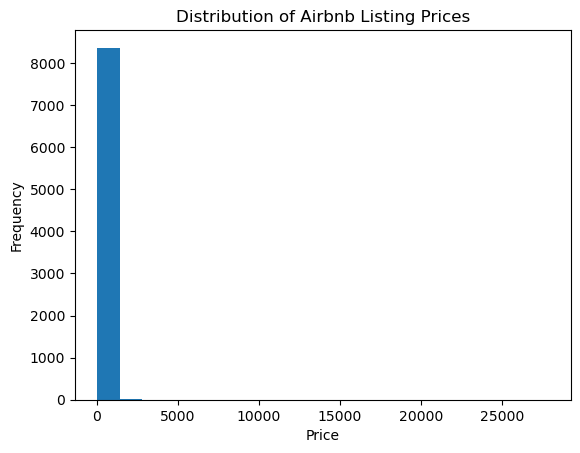

In [30]:
plt.hist(data['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Listing Prices')
plt.show()

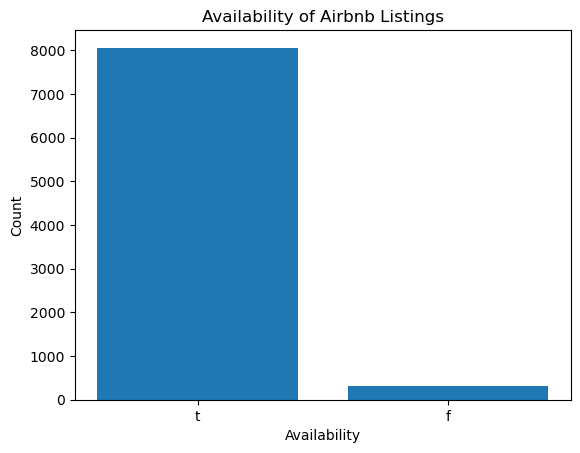

In [31]:
availability_counts = data['has_availability'].value_counts()
plt.bar(availability_counts.index, availability_counts.values)
plt.xlabel('Availability')
plt.ylabel('Count')
plt.title('Availability of Airbnb Listings')
plt.show()


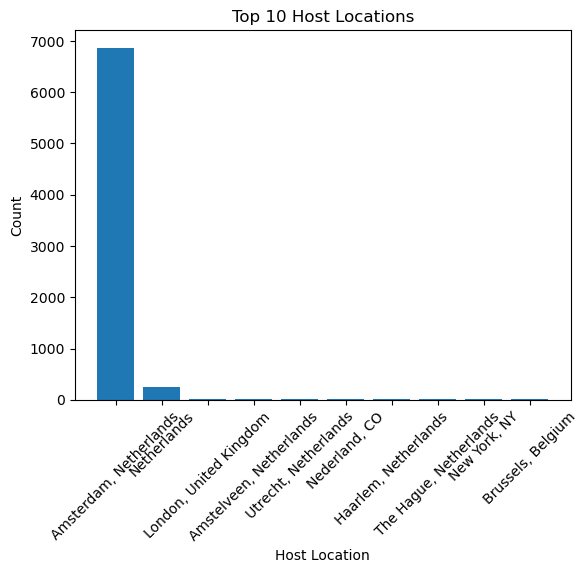

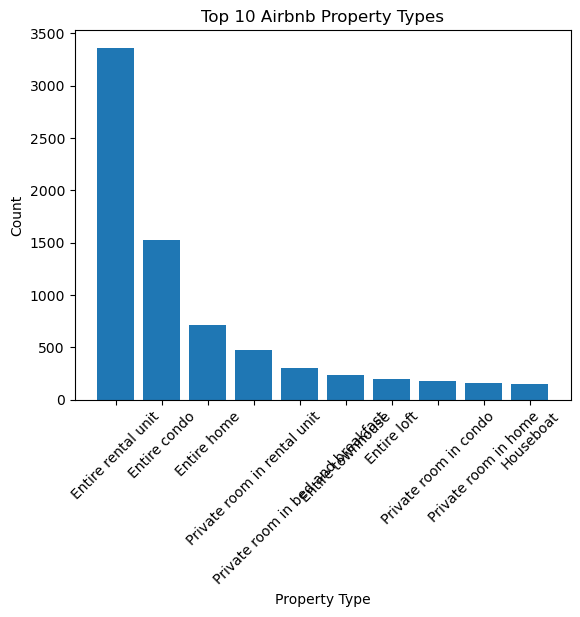

In [32]:
# Plotting a bar chart of host locations
location_counts = data['host_location'].value_counts().head(10)
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Host Location')
plt.ylabel('Count')
plt.title('Top 10 Host Locations')
plt.xticks(rotation=45)
plt.show()

# Plotting a bar chart of property types
property_type_counts = data['property_type'].value_counts().head(10)
plt.bar(property_type_counts.index, property_type_counts.values)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Top 10 Airbnb Property Types')
plt.xticks(rotation=45)
plt.show()